In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

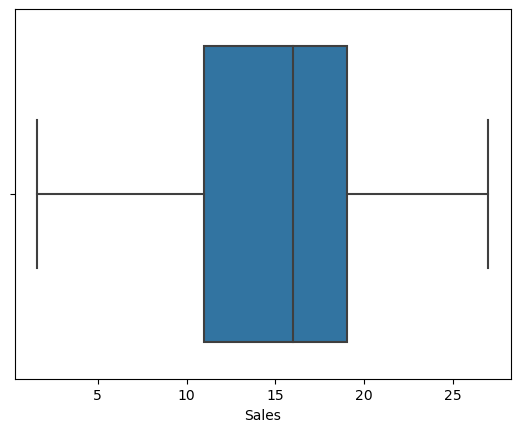

In [9]:
sns.boxplot(x=df['Sales'])
plt.show()

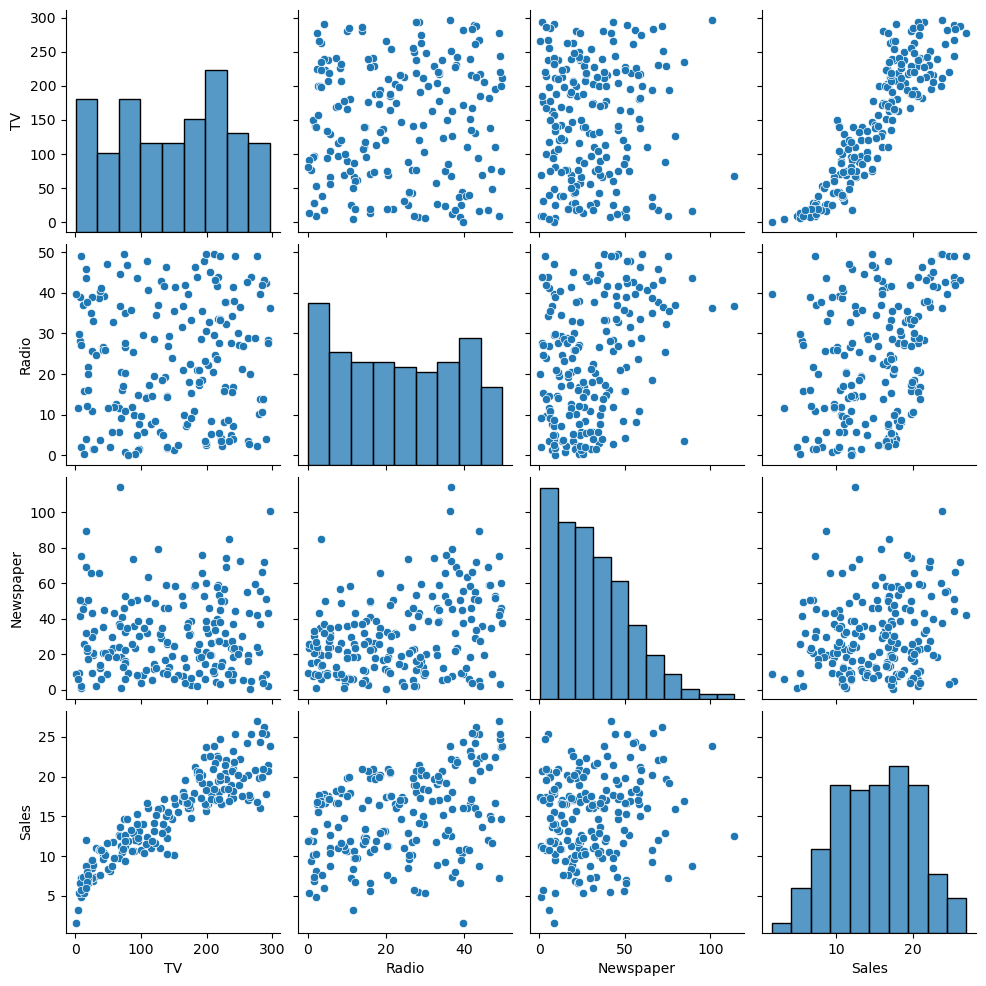

In [10]:
sns.pairplot(df)
plt.show()

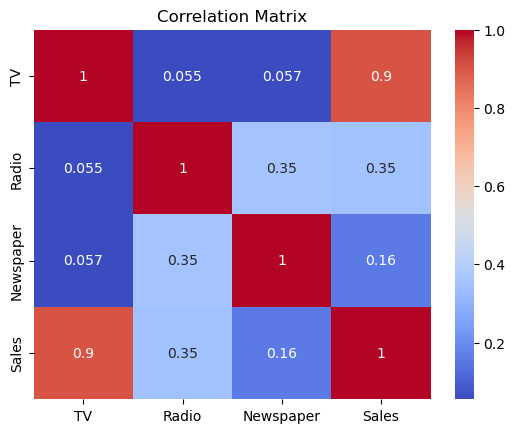

In [11]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

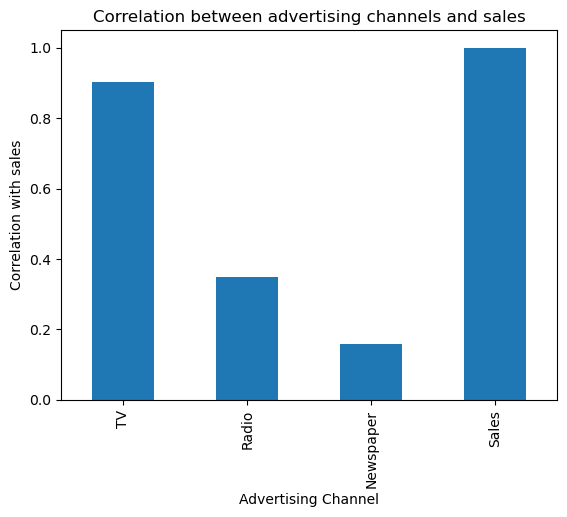

In [12]:
correlation = df.corr()
correlation_with_sales= correlation['Sales']
correlation_with_sales.plot(kind='bar')
plt.xlabel('Advertising Channel')
plt.ylabel('Correlation with sales')
plt.title('Correlation between advertising channels and sales')
plt.show()

In [14]:
X= df[['TV','Radio','Newspaper']]
scaler = StandardScaler()
X =scaler.fit_transform(X)

In [15]:
y= df['Sales']
test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [17]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"r2_score: {r2}")

mae: 1.2748262109549349
mse: 2.9077569102710923
r2_score: 0.9059011844150826


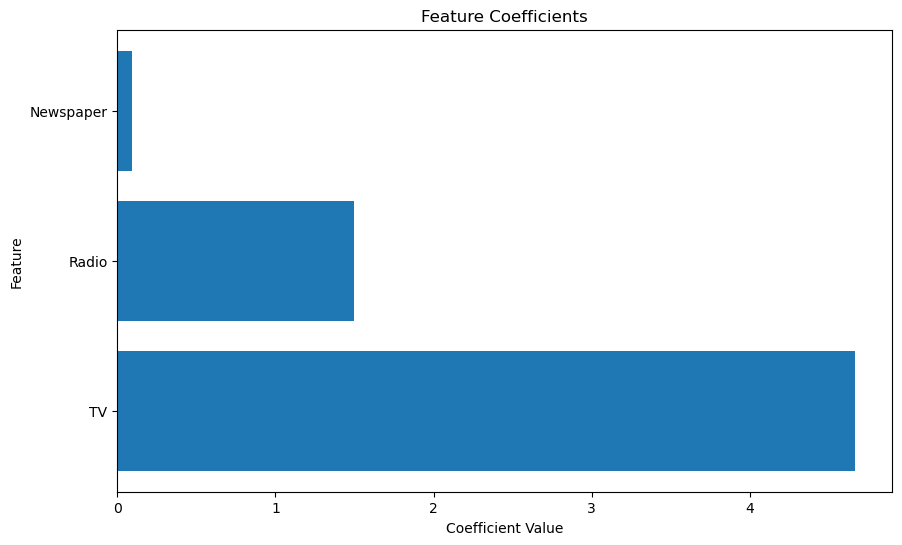

In [18]:
feature_name= ['TV','Radio','Newspaper']
plt.figure(figsize=(10,6))
plt.barh(feature_name, model.coef_)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()